In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
# Import the common module.
import numpy as np
import os

# To maintain the execution result
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# To display a graph
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
# To draw a black-and-white image
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

In [5]:
# 3D dataset
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [6]:
# AutoEncoder
np.random.seed(42)
tf.random.set_seed(42)

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1.5))
history = autoencoder.fit(X_train, X_train, epochs=20)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 316ms/step - loss: 0.4732
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.6201 
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2101
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2000
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1114
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0819
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0612
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0544
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0527
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0520
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0512
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0503
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0493
Epoch 14/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0480
Epoch 15/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0466
Epoch 16/20
2/2 ━━━━━━━━━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


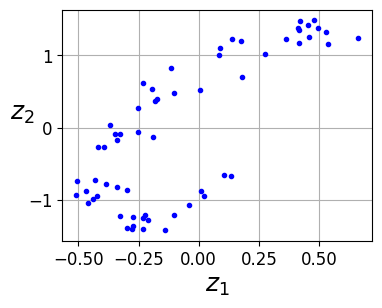

In [7]:
codings = encoder.predict(X_train)
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.show()